## TASEP

# Model

- $N$ normal particle (1) on a ring of size $L$. Empty site(0).  

$$
10 \to 01 \,\,\mbox{with rate}\,\, 1
$$

# Simulation Program

Program: TASEP.c

- How to compile. 

- $random.h$ is neccesary. 

gcc -O3 TASEP.c -lm

- How to run. 

./a.out 1000000

$N\in \{2,5,10,15,\cdots,95\},L=100$

# DATA

Three Files.

#### rho_vs_J_v0_mean_v1_mean_L100.csv

- $\rho=N/L$ 

- $J$ is the average number of moved particle per site 

$$
J=\rho(1-\rho)
$$

- $v_0$  and $v_1$ is the velocity of particle 0 and particle 1.

$$
E[v_0]=E[v_1]=(1-\rho)
$$

#### t_N_vs_x0_L100.csv and t_N_vs_x1_L100.csv

- Time series data of the movement of particle 0 and 1 as function of $t$(row) and $N$(column).

# DATA Analysis

In [49]:
import pandas as pd
import numpy as np
import datatable as dt
import matplotlib.pyplot as plt
import array
import math

In [50]:
rho_vs_J_v = pd.read_csv("rho_vs_J_v0_mean_v1_mean_L100.csv")

In [51]:
rho_vs_J_v.head(5)

,rho,J,v0_mean,v1_mean
0,0.02,0.019794,0.989671,0.989748
1,0.05,0.047968,0.959385,0.959354
2,0.10,0.090866,0.908670,0.908660
3,0.15,0.128802,0.858692,0.858695
4,0.20,0.161775,0.808862,0.808862


In [52]:
rho_vs_J_v['v1_mean ']

0     0.989748
1     0.959354
2     0.908660
3     0.858695
4     0.808862
5     0.757797
6     0.706717
7     0.656560
8     0.606111
9     0.555856
10    0.504932
11    0.454727
12    0.404119
13    0.353433
14    0.303109
15    0.252559
16    0.202007
17    0.151418
18    0.101025
19    0.050480
Name: v1_mean , dtype: float64

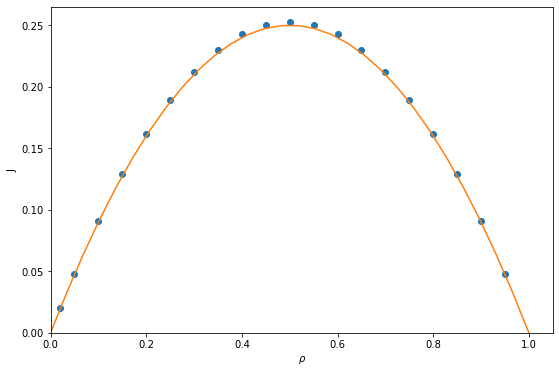

In [53]:
plt.figure(figsize=(9,6))
plt.plot(rho_vs_J_v['rho'], rho_vs_J_v['J'], linestyle='None', marker='o')
x=np.linspace(0,1,30)
plt.plot(x, x*(1-x))
plt.xlim(0,)
plt.ylim(0,)
plt.xlabel(r'$\rho$')
plt.ylabel('J')

plt.show()

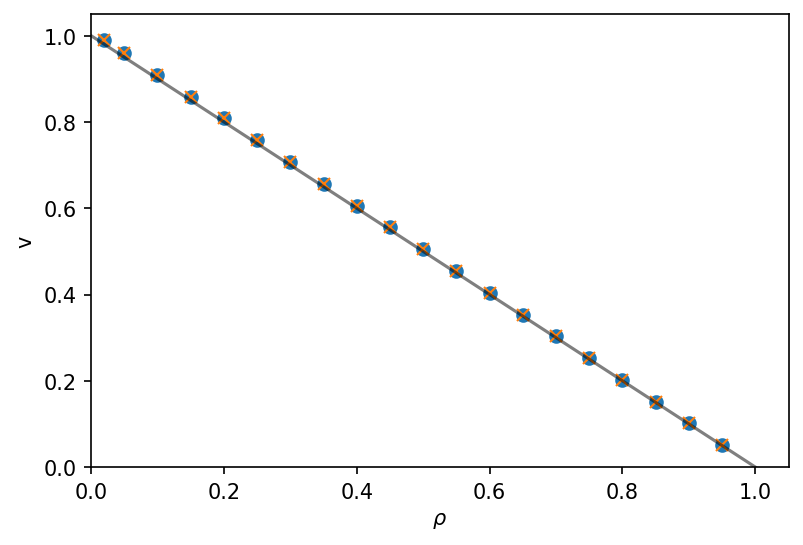

In [54]:
plt.figure(dpi=150)
plt.plot(rho_vs_J_v['rho'], rho_vs_J_v['v0_mean'], linestyle='None', marker='o')
plt.plot(rho_vs_J_v['rho'], rho_vs_J_v['v1_mean '], linestyle='None', marker='x')
x=np.linspace(0,1,30)
plt.plot(x, 1-x, color='k', alpha=0.5)
plt.xlim(0,)
plt.ylim(0,)
plt.xlabel(r'$\rho$')
plt.ylabel('v')

plt.show()

# Velocity Distribution

In [55]:
d1 = dt.fread('t_N_vs_x0_L100.csv')
d2 = dt.fread('t_N_vs_x1_L100.csv')
d1 = d1.to_pandas()
d2 = d2.to_pandas()

In [56]:
pd.set_option('display.max_columns', None)

In [57]:
d1.head(10)

,t,2,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,2,0,2,2,1,0,0,0,0,0,1,1,1,0,0,0,0,1,0,0
2,2,2,1,2,2,1,1,0,0,0,0,1,1,1,0,0,0,0,1,0,0
3,3,3,2,3,2,1,1,1,1,0,0,1,1,3,1,0,1,0,1,0,0
4,4,4,4,3,2,1,1,5,1,0,0,1,1,3,1,0,1,0,1,0,0
5,5,5,5,5,2,1,2,5,1,0,0,1,1,3,1,1,1,0,1,0,0
6,6,6,5,7,3,1,4,6,3,1,1,1,1,3,2,1,1,0,1,0,0
7,7,8,7,8,4,2,5,6,4,1,2,1,1,3,2,1,3,0,3,0,0
8,8,9,9,9,5,3,6,6,4,1,2,1,1,3,2,1,3,0,3,0,0
9,9,11,9,10,6,3,7,9,4,1,3,2,1,3,3,1,3,0,3,0,0


In [58]:
d2.head(10)

,t,2,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95
0,0,19,40,14,4,2,5,4,2,1,1,2,2,3,1,1,1,1,2,1,1
1,1,19,44,14,8,2,5,4,5,1,1,2,2,4,1,1,1,1,2,1,1
2,2,21,45,16,8,4,5,5,7,1,1,3,2,4,1,2,1,1,2,1,2
3,3,22,46,18,8,6,8,6,7,1,1,3,2,4,2,3,2,1,2,1,2
4,4,23,46,19,9,6,8,6,7,1,1,3,2,4,2,3,2,1,2,1,2
5,5,24,47,19,9,8,8,6,8,1,2,3,2,4,3,4,2,1,2,1,2
6,6,25,48,22,9,10,8,8,11,2,3,3,2,4,3,4,4,1,2,1,2
7,7,25,50,23,11,10,8,8,11,2,3,4,2,4,3,4,4,1,4,1,2
8,8,26,51,24,12,11,10,10,11,2,3,5,2,4,3,4,4,1,4,1,2
9,9,26,53,25,12,12,11,10,11,3,4,6,3,4,4,4,4,1,4,1,2


In [59]:
df_distance = d2-d1
df_distance = df_distance.drop('t', axis=1)
# df_distance = pd.concat([df_t, df_distance], axis=1)
df_distance

,2,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95
0,19,40,14,4,2,5,4,2,1,1,2,2,3,1,1,1,1,2,1,1
1,17,44,12,6,1,5,4,5,1,1,1,1,3,1,1,1,1,1,1,1
2,19,44,14,6,3,4,5,7,1,1,2,1,3,1,2,1,1,1,1,2
3,19,44,15,6,5,7,5,6,1,1,2,1,1,1,3,1,1,1,1,2
4,19,42,16,7,5,7,1,6,1,1,2,1,1,1,3,1,1,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999996,94,11,7,7,1,1,3,2,5,2,3,1,2,1,3,1,2,1,1,2
999997,96,10,6,7,2,1,3,2,4,3,3,1,1,1,2,1,1,1,1,2
999998,96,11,6,7,2,1,3,3,3,1,4,1,2,1,3,1,1,1,1,2
999999,94,11,5,6,1,1,3,4,3,1,4,2,1,1,5,2,1,2,1,2


In [60]:
plt.figure()
df_distance.plot(subplots=True, figsize=(100,100), layout=(20,1), sharex=True, sharey=True)
plt.savefig('bus_distance.png')
plt.close('all')
# plt.show()

In [61]:
def xt_dt2vt(xt, dt):
    dx = xt.diff(dt)
    vt = dx/dt

    return(vt[dt:])

In [62]:
xt_dt2vt(d1['2'],10)

10         1.2
11         1.0
12         1.2
13         1.2
14         1.1
          ... 
999996     0.7
999997     0.7
999998     0.8
999999     0.9
1000000    0.9
Name: 2, Length: 999991, dtype: float64

- $N=2$

In [63]:
var_vt_4 = np.var(xt_dt2vt(d1['2'],4))
var_vt_10 = np.var(xt_dt2vt(d1['2'],10))
var_vt_20 = np.var(xt_dt2vt(d1['2'],20))
var_vt_50 = np.var(xt_dt2vt(d1['2'],50))
var_vt_100 = np.var(xt_dt2vt(d1['2'],100))
var_vt_400 = np.var(xt_dt2vt(d1['2'],400))
var_vt_1000 = np.var(xt_dt2vt(d1['2'],1000))

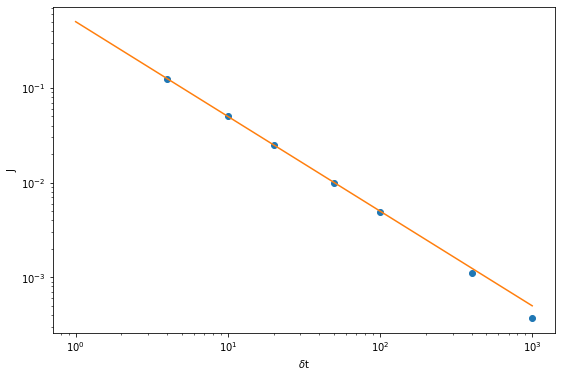

In [64]:
ts = [4,10,20,50,100,400,1000]
var_vts = [var_vt_4,var_vt_10,var_vt_20,var_vt_50,var_vt_100,var_vt_400,var_vt_1000]

plt.figure(figsize=(9,6))
plt.plot(ts, var_vts, linestyle='None', marker='o')
x=np.linspace(1,1000,30)
plt.plot(x, 0.5/x)
plt.yscale('log')
plt.xscale('log')
plt.xlabel(r'$\delta$t')
plt.ylabel('J')

plt.show()

- $N=20$

In [65]:
var_vt_4 =    np.var(xt_dt2vt(d1['20'],4))
var_vt_10 =   np.var(xt_dt2vt(d1['20'],10))
var_vt_20 =   np.var(xt_dt2vt(d1['20'],20))
var_vt_50 =   np.var(xt_dt2vt(d1['20'],50))
var_vt_100 =  np.var(xt_dt2vt(d1['20'],100))
var_vt_400 =  np.var(xt_dt2vt(d1['20'],400))
var_vt_1000 = np.var(xt_dt2vt(d1['20'],1000))

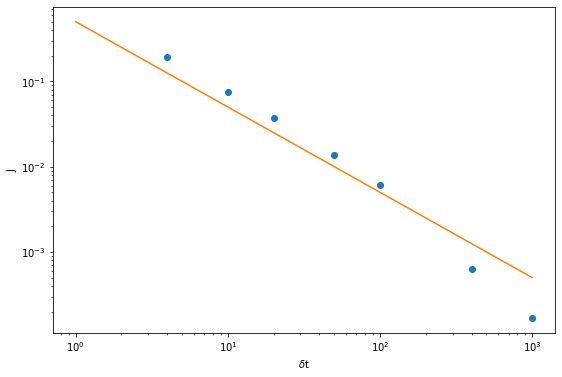

In [66]:
ts = [4,10,20,50,100,400,1000]
var_vts = [var_vt_4,var_vt_10,var_vt_20,var_vt_50,var_vt_100,var_vt_400,var_vt_1000]

plt.figure(figsize=(9,6))
plt.plot(ts, var_vts, linestyle='None', marker='o')
x=np.linspace(1,1000,30)
plt.plot(x, 0.5/x)
plt.yscale('log')
plt.xscale('log')
plt.xlabel(r'$\delta$t')
plt.ylabel('J')

plt.show()

- $N=50$

In [67]:
var_vt_4 =    np.var(xt_dt2vt(d1['50'],4))
var_vt_10 =   np.var(xt_dt2vt(d1['50'],10))
var_vt_20 =   np.var(xt_dt2vt(d1['50'],20))
var_vt_50 =   np.var(xt_dt2vt(d1['50'],50))
var_vt_100 =  np.var(xt_dt2vt(d1['50'],100))
var_vt_400 =  np.var(xt_dt2vt(d1['50'],400))
var_vt_1000 = np.var(xt_dt2vt(d1['50'],1000))

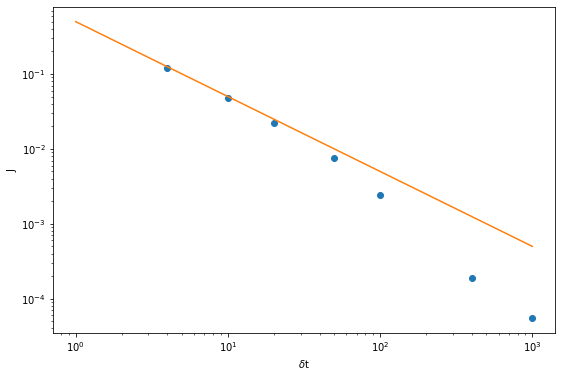

In [68]:
ts = [4,10,20,50,100,400,1000]
var_vts = [var_vt_4,var_vt_10,var_vt_20,var_vt_50,var_vt_100,var_vt_400,var_vt_1000]

plt.figure(figsize=(9,6))
plt.plot(ts, var_vts, linestyle='None', marker='o')
x=np.linspace(1,1000,30)
plt.plot(x, 0.5/x)
plt.yscale('log')
plt.xscale('log')
plt.xlabel(r'$\delta$t')
plt.ylabel('J')

plt.show()

- $N=95$

In [69]:
var_vt_4 =    np.var(xt_dt2vt(d1['95'],4))
var_vt_10 =   np.var(xt_dt2vt(d1['95'],10))
var_vt_20 =   np.var(xt_dt2vt(d1['95'],20))
var_vt_50 =   np.var(xt_dt2vt(d1['95'],50))
var_vt_100 =  np.var(xt_dt2vt(d1['95'],100))
var_vt_400 =  np.var(xt_dt2vt(d1['95'],400))
var_vt_1000 = np.var(xt_dt2vt(d1['95'],1000))

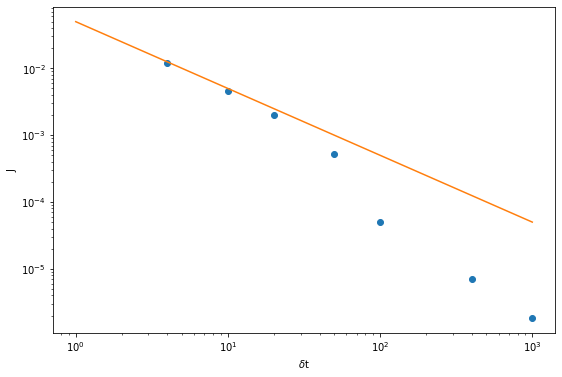

In [70]:
ts = [4,10,20,50,100,400,1000]
var_vts = [var_vt_4,var_vt_10,var_vt_20,var_vt_50,var_vt_100,var_vt_400,var_vt_1000]

plt.figure(figsize=(9,6))
plt.plot(ts, var_vts, linestyle='None', marker='o')
x=np.linspace(1,1000,30)
plt.plot(x, 0.05/x)
plt.yscale('log')
plt.xscale('log')
plt.xlabel(r'$\delta$t')
plt.ylabel('J')

plt.show()

## Corr

In [71]:
def x01_dt2corr_v01(x0,x1,dt):
    dx0=x0.diff(dt)[dt:]
    dx1=x1.diff(dt)[dt:]
    corr=np.corrcoef(dx0,dx1)

    return(corr[0,1])

In [72]:
j='2'

In [73]:
x01_dt2corr_v01(d1[j],d2[j],2)

-0.9571448345705913

- $N=2$

In [74]:
j='2'
corr_v_1   =x01_dt2corr_v01(d1[j],d2[j],1)
corr_v_4   =x01_dt2corr_v01(d1[j],d2[j],4)
corr_v_10  =x01_dt2corr_v01(d1[j],d2[j],10)
corr_v_20  =x01_dt2corr_v01(d1[j],d2[j],20)
corr_v_50  =x01_dt2corr_v01(d1[j],d2[j],50)
corr_v_100 =x01_dt2corr_v01(d1[j],d2[j],100)
corr_v_400 =x01_dt2corr_v01(d1[j],d2[j],400)
corr_v_1000=x01_dt2corr_v01(d1[j],d2[j],1000)

In [75]:
corr_v_4

-0.9399935234526066

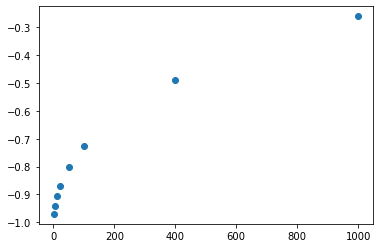

In [76]:
ts=[1,4,10,20,50,100,400,1000]
corr_vts=[corr_v_1,corr_v_4,corr_v_10,corr_v_20,corr_v_50,corr_v_100,corr_v_400,corr_v_1000]

plt.plot(ts,corr_vts, linestyle='None', marker='o')
plt.show()

- $N=5$

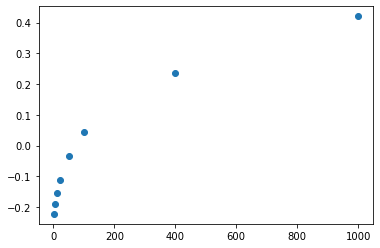

In [77]:
j='5'
corr_v_1   =x01_dt2corr_v01(d1[j],d2[j],1)
corr_v_4   =x01_dt2corr_v01(d1[j],d2[j],4)
corr_v_10  =x01_dt2corr_v01(d1[j],d2[j],10)
corr_v_20  =x01_dt2corr_v01(d1[j],d2[j],20)
corr_v_50  =x01_dt2corr_v01(d1[j],d2[j],50)
corr_v_100 =x01_dt2corr_v01(d1[j],d2[j],100)
corr_v_400 =x01_dt2corr_v01(d1[j],d2[j],400)
corr_v_1000=x01_dt2corr_v01(d1[j],d2[j],1000)

ts=[1,4,10,20,50,100,400,1000]
corr_vts=[corr_v_1,corr_v_4,corr_v_10,corr_v_20,corr_v_50,corr_v_100,corr_v_400,corr_v_1000]

plt.plot(ts,corr_vts, linestyle='None', marker='o')
plt.show()

- $N=10$

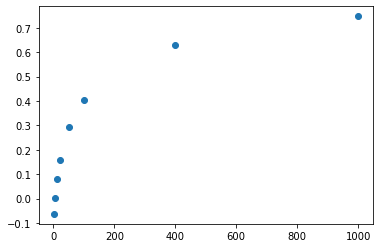

In [78]:
j='10'
corr_v_1   =x01_dt2corr_v01(d1[j],d2[j],1)
corr_v_4   =x01_dt2corr_v01(d1[j],d2[j],4)
corr_v_10  =x01_dt2corr_v01(d1[j],d2[j],10)
corr_v_20  =x01_dt2corr_v01(d1[j],d2[j],20)
corr_v_50  =x01_dt2corr_v01(d1[j],d2[j],50)
corr_v_100 =x01_dt2corr_v01(d1[j],d2[j],100)
corr_v_400 =x01_dt2corr_v01(d1[j],d2[j],400)
corr_v_1000=x01_dt2corr_v01(d1[j],d2[j],1000)

ts=[1,4,10,20,50,100,400,1000]
corr_vts=[corr_v_1,corr_v_4,corr_v_10,corr_v_20,corr_v_50,corr_v_100,corr_v_400,corr_v_1000]

plt.plot(ts,corr_vts, linestyle='None', marker='o')
plt.show()

- $N=20$

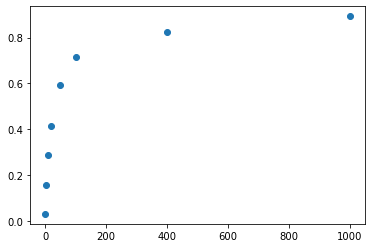

In [79]:
j='20'
corr_v_1   =x01_dt2corr_v01(d1[j],d2[j],1)
corr_v_4   =x01_dt2corr_v01(d1[j],d2[j],4)
corr_v_10  =x01_dt2corr_v01(d1[j],d2[j],10)
corr_v_20  =x01_dt2corr_v01(d1[j],d2[j],20)
corr_v_50  =x01_dt2corr_v01(d1[j],d2[j],50)
corr_v_100 =x01_dt2corr_v01(d1[j],d2[j],100)
corr_v_400 =x01_dt2corr_v01(d1[j],d2[j],400)
corr_v_1000=x01_dt2corr_v01(d1[j],d2[j],1000)

ts=[1,4,10,20,50,100,400,1000]
corr_vts=[corr_v_1,corr_v_4,corr_v_10,corr_v_20,corr_v_50,corr_v_100,corr_v_400,corr_v_1000]

plt.plot(ts,corr_vts, linestyle='None', marker='o')
plt.show()

- $N=50$

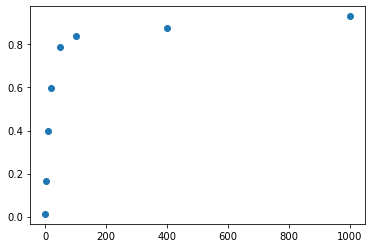

In [80]:
j='50'
corr_v_1   =x01_dt2corr_v01(d1[j],d2[j],1)
corr_v_4   =x01_dt2corr_v01(d1[j],d2[j],4)
corr_v_10  =x01_dt2corr_v01(d1[j],d2[j],10)
corr_v_20  =x01_dt2corr_v01(d1[j],d2[j],20)
corr_v_50  =x01_dt2corr_v01(d1[j],d2[j],50)
corr_v_100 =x01_dt2corr_v01(d1[j],d2[j],100)
corr_v_400 =x01_dt2corr_v01(d1[j],d2[j],400)
corr_v_1000=x01_dt2corr_v01(d1[j],d2[j],1000)

ts=[1,4,10,20,50,100,400,1000]
corr_vts=[corr_v_1,corr_v_4,corr_v_10,corr_v_20,corr_v_50,corr_v_100,corr_v_400,corr_v_1000]

plt.plot(ts,corr_vts, linestyle='None', marker='o')
plt.show()

- $N=95$

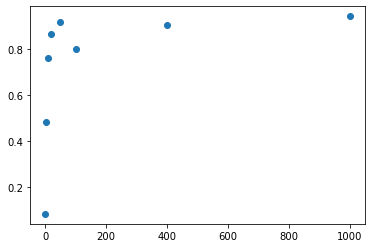

In [81]:
j='95'
corr_v_1   =x01_dt2corr_v01(d1[j],d2[j],1)
corr_v_4   =x01_dt2corr_v01(d1[j],d2[j],4)
corr_v_10  =x01_dt2corr_v01(d1[j],d2[j],10)
corr_v_20  =x01_dt2corr_v01(d1[j],d2[j],20)
corr_v_50  =x01_dt2corr_v01(d1[j],d2[j],50)
corr_v_100 =x01_dt2corr_v01(d1[j],d2[j],100)
corr_v_400 =x01_dt2corr_v01(d1[j],d2[j],400)
corr_v_1000=x01_dt2corr_v01(d1[j],d2[j],1000)

ts=[1,4,10,20,50,100,400,1000]
corr_vts=[corr_v_1,corr_v_4,corr_v_10,corr_v_20,corr_v_50,corr_v_100,corr_v_400,corr_v_1000]

plt.plot(ts,corr_vts, linestyle='None', marker='o')
plt.show()

In [82]:
rho = rho_vs_J_v['rho']

In [83]:
def diffusion(xt, dt):
    dx = np.var(xt.diff(dt))
    diff = dx/dt

    return diff

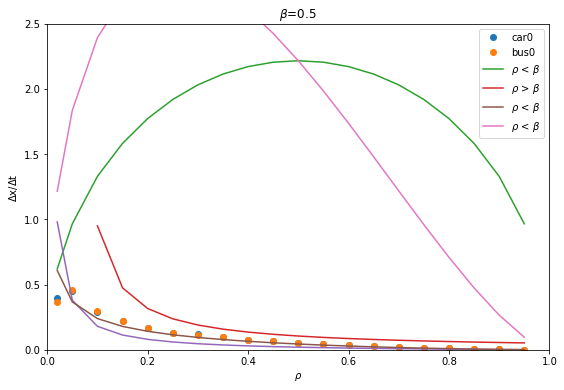

In [88]:
delta_y = []
for i in range(1,21):
    d = diffusion(d1.iloc[:,i],1000)
    delta_y.append(d)

delta_x = []
for i in range(1,21):
    d = diffusion(d2.iloc[:,i],1000)
    delta_x.append(d)


b = 0.05
L = 100

plt.figure(figsize=(9,6))
plt.plot(rho, delta_x, linestyle='None', marker='o', label='car0')
plt.plot(rho, delta_y, linestyle='None', marker='o', label='bus0')

plt.plot(rho, np.sqrt(L*math.pi*(rho-np.square(rho)))/4, label=r'$\rho$ < $\beta$')
plt.plot(rho, b*(1-b)/(rho-b), label=r'$\rho$ > $\beta$')
plt.plot(rho, 2*(1-rho)/(L*rho))
plt.plot(rho, np.sqrt(math.pi*np.power(1-rho,3)/(L*rho))/2, label=r'$\rho$ < $\beta$')
plt.plot(rho, np.sqrt(math.pi)*np.power(1-rho,3/2)/2*np.sqrt(L*rho), label=r'$\rho$ < $\beta$')
# plt.plot(rho, (np.sqrt(L*(rho-np.square(rho))))/2)
# plt.yscale('log')
# plt.xscale('log')
plt.xlim(0,1)
plt.ylim(0,2.5)
plt.xlabel(r'$\rho$')
plt.ylabel(r'$\Delta$x/$\Delta$t')
plt.title(r'$\beta$=0.5')
plt.legend()
# plt.savefig('beta0.5.png', dpi=600)

plt.show()

In [85]:
delta_x

[0.3960526859759189,
 0.44890780099523564,
 0.29095513837497267,
 0.2200238753684005,
 0.16879115391386665,
 0.1314554011526465,
 0.11742407039465017,
 0.09594081963638225,
 0.07856773374393848,
 0.06485626124655272,
 0.05493009288778339,
 0.045296622355384356,
 0.036842426712921844,
 0.029060271024536965,
 0.02294055702287366,
 0.017181671855390216,
 0.01262671205760925,
 0.008545742407433565,
 0.004566276275516013,
 0.001823005497138405]